In [34]:
!pip install numpy
!pip install matplotlib

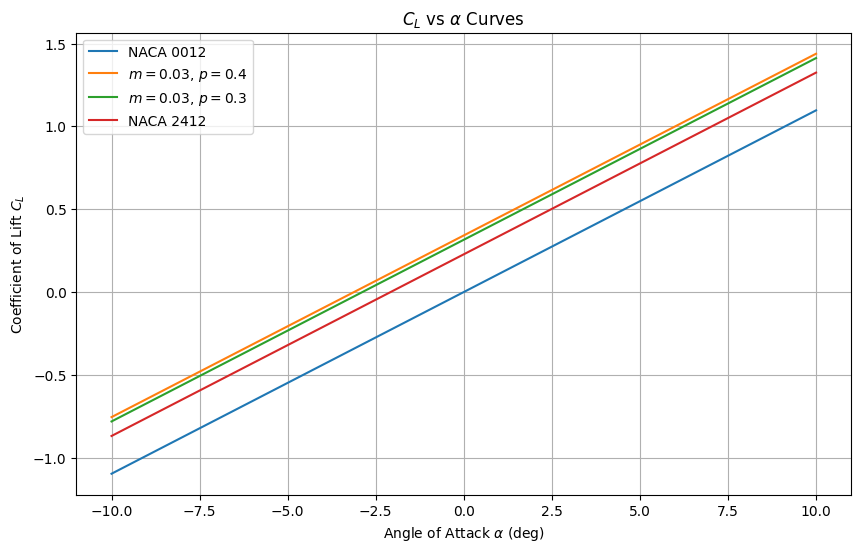

In [35]:
import numpy as np
import matplotlib.pyplot as plt

p_values = [0.3, 0.4]
m = 0.03

def alpha_L0(m, p):
    theta_p = np.arccos(1 - 2*p)
    t1 = -m / (np.pi * p**2)
    t2 = -2*p*theta_p + 2*p*np.sin(theta_p) + (3*theta_p)/2 - 2*np.sin(theta_p) + np.sin(2*theta_p)/4
    t3 = m/(np.pi*(1 - p)**2)
    t4 = -2*p*theta_p + 2*p*np.sin(theta_p) + (3*theta_p)/2 - 2*np.sin(theta_p) + np.sin(2*theta_p)/4 + 2*np.pi*p - (3*np.pi)/2
    return (t1 * t2) + (t3 * t4)

alpha_rad = np.linspace(np.radians(-10), np.radians(10), 100)
alpha_deg = np.degrees(alpha_rad)

plt.figure(figsize=(10,6))
plt.plot(alpha_deg, 2 * np.pi * alpha_rad, label="NACA 0012")
plt.plot(alpha_deg, 2 * np.pi * (alpha_rad - alpha_L0(m, p_values[1])), label=f"$m={m:.2f}$, $p={p_values[1]}$")
plt.plot(alpha_deg, 2 * np.pi * (alpha_rad - alpha_L0(m, p_values[0])), label=f"$m={m:.2f}$, $p={p_values[0]}$")
plt.plot(alpha_deg, 2 * np.pi * (alpha_rad - 0.0044929) + np.pi*(0.081495), label="NACA 2412")
plt.title("$C_L$ vs $\\alpha$ Curves")
plt.xlabel("Angle of Attack $\\alpha$ (deg)")
plt.ylabel("Coefficient of Lift $C_L$")
plt.grid(True)
plt.legend()
plt.show()

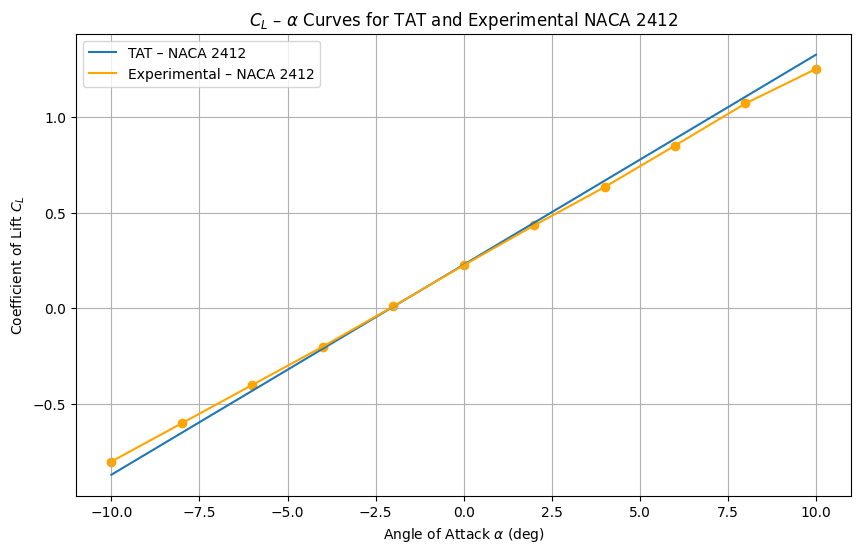

In [36]:
import numpy as np
import matplotlib.pyplot as plt

#Experimental data eyeballed
alpha_exp_deg = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10])
cl_exp = np.array([-0.8, -0.6, -0.4, -0.2, 0.01, 0.225, 0.433, 0.633, 0.85, 1.07, 1.25])

alpha_rad = np.linspace(np.radians(-10), np.radians(10), 100)
alpha_deg = np.degrees(alpha_rad)

plt.figure(figsize=(10,6))
plt.plot(alpha_deg, 2 * np.pi * (alpha_rad - 0.0044929) + np.pi*(0.081495), label="TAT – NACA 2412")
plt.scatter(alpha_exp_deg, cl_exp, color='orange')
plt.plot(alpha_exp_deg, cl_exp, color='orange', label="Experimental – NACA 2412")
plt.title("$C_L$ – $\\alpha$ Curves for TAT and Experimental NACA 2412")
plt.xlabel("Angle of Attack $\\alpha$ (deg)")
plt.ylabel("Coefficient of Lift $C_L$")
plt.grid(True)
plt.legend()
plt.show()

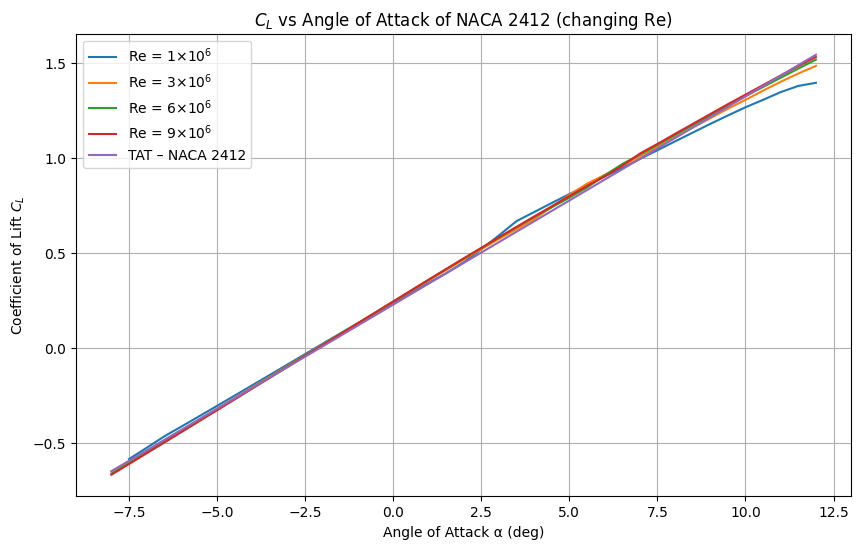

In [37]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.loadtxt("Re1106.txt")
data2 = np.loadtxt("Re3106.txt")
data3 = np.loadtxt("Re6106.txt")
data4 = np.loadtxt("Re9106.txt")

alpha_deg_1 = data1[:, 0]
cl_1 = data1[:, 1]
alpha_deg_2 = data2[:, 0]
cl_2 = data2[:, 1]
alpha_deg_3 = data3[:, 0]
cl_3 = data3[:, 1]
alpha_deg_4 = data4[:, 0]
cl_4 = data4[:, 1]

alpha_rad = np.linspace(np.radians(-8), np.radians(12), 100)
alpha_deg = np.degrees(alpha_rad)

plt.figure(figsize=(10,6))
plt.plot(alpha_deg_1, cl_1, label="Re = $1×10^6$")
plt.plot(alpha_deg_2, cl_2, label="Re = $3×10^6$")
plt.plot(alpha_deg_3, cl_3, label="Re = $6×10^6$")
plt.plot(alpha_deg_4, cl_4, label="Re = $9×10^6$")
plt.plot(alpha_deg, 2 * np.pi * (alpha_rad - 0.0044929) + np.pi*(0.081495), label="TAT – NACA 2412")
plt.xlabel("Angle of Attack α (deg)")
plt.ylabel("Coefficient of Lift $C_L$")
plt.title("$C_L$ vs Angle of Attack of NACA 2412 (changing Re)")
plt.grid(True)
plt.legend()
plt.show()

In [39]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

coords = np.loadtxt("naca2412.dat")
coords = coords[::-1, :]
x = coords[:, 0]
y = coords[:, 1]

def compute_CL(alpha_deg, x, y):
    alpha_rad = np.deg2rad(alpha_deg)
    num_panels = len(x) - 1

    x_c = (x[:-1] + x[1:]) / 2
    y_c = (y[:-1] + y[1:]) / 2
    dx = x[1:] - x[:-1]
    dy = y[1:] - y[:-1]
    S = np.sqrt(dx**2 + dy**2)
    theta = np.arctan2(dy, dx)

    C_n1 = np.zeros((num_panels, num_panels))
    C_n2 = np.zeros((num_panels, num_panels))
    C_t1 = np.zeros((num_panels, num_panels))
    C_t2 = np.zeros((num_panels, num_panels))
    A_n = np.zeros((num_panels + 1, num_panels + 1))
    RHS = np.zeros((num_panels + 1, 1))

    for i in range(num_panels):
        for j in range(num_panels):
            if j != i:
                A = - (x_c[i] - x[j]) * np.cos(theta[j]) - (y_c[i] - y[j]) * np.sin(theta[j])
                B = (x_c[i] - x[j])**2 + (y_c[i] - y[j])**2
                C = np.sin(theta[i] - theta[j])
                D = np.cos(theta[i] - theta[j])
                E = (x_c[i] - x[j]) * np.sin(theta[j]) - (y_c[i] - y[j]) * np.cos(theta[j])
                F = np.log(1 + (S[j]**2 + 2 * A * S[j]) / B)
                G = np.arctan2(E * S[j], (B + A * S[j]))
                P = ((x_c[i] - x[j]) * np.sin(theta[i] - 2 * theta[j]) +
                     (y_c[i] - y[j]) * np.cos(theta[i] - 2 * theta[j]))
                Q = ((x_c[i] - x[j]) * np.cos(theta[i] - 2 * theta[j]) -
                     (y_c[i] - y[j]) * np.sin(theta[i] - 2 * theta[j]))

                C_n2[i, j] = D + 0.5 * Q * F / S[j] - (A * C + D * E) * G / S[j]
                C_n1[i, j] = 0.5 * D * F + C * G - C_n2[i, j]
                C_t2[i, j] = C + 0.5 * P * F / S[j] + (A * D - C * E) *  G / S[j]
                C_t1[i, j] = 0.5 * C * F - D * G - C_t2[i, j]
            else:
                C_n1[i, j] = -1
                C_n2[i, j] = 1
                C_t1[i, j] = 0.5 * np.pi
                C_t2[i, j] = 0.5 * np.pi

            if j ==0:
                A_n[i, j] = C_n1[i, j]
                A_t[i, j] = C_t1[i, j]
            else:
                A_n[i, j] = C_n1[i, j] + C_n2[i, j - 1]
                A_t[i, j] = C_t1[i, j] + C_t2[i, j - 1]

        A_n[i, num_panels] = C_n2[i, num_panels - 1]
        A_t[i, num_panels] = C_t2[i, num_panels - 1]
        RHS[i, 0] 